In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image

import tensorflow as tf

import supervision as sv

In [2]:
TRAIN_DATASET_PATH = "./dataset/train"
VAL_DATASET_PATH = "./dataset/valid"
TEST_DATASET_PATH = "./dataset/test"

LABELS_FOLDER = "/labels"
IMAGES_FOLDER = "/images"

CSV_LABELS_NAME = "/labels.csv"
RECORD_FILE_NAME = "/dataset.record"

DATA_YAML = "./dataset/data.yaml"

IMG_WIDTH = 416
IMG_HEIGHT = 416

In [14]:
def load_dataset(path: str) -> pd.DataFrame:
    dct = {
        "filename": [],
        "width": [],
        "height": [],
        "class": [],
        "xmin": [],
        "ymin": [],
        "xmax": [],
        "ymax": []
    }

    for image in os.listdir(path):
        label_file = open(path + "/" + image)

        labels_str = label_file.read().split(sep="\n")
        for label in labels_str:
            label_parts = label.split()

            width_half = float(label_parts[3]) / 2
            height_half = float(label_parts[4]) / 2
            xmin = (float(label_parts[1]) - width_half) * IMG_WIDTH
            ymin = (float(label_parts[2]) - height_half) * IMG_HEIGHT
            xmax = (float(label_parts[1]) + width_half) * IMG_WIDTH
            ymax = (float(label_parts[2]) + height_half) * IMG_HEIGHT

            dct["filename"].append(image[:-3] + "jpg")
            dct["width"].append(IMG_WIDTH)
            dct["height"].append(IMG_HEIGHT)
            dct["class"].append(int(label_parts[0]) + 1)
            dct["xmin"].append(int(xmin))
            dct["ymin"].append(int(ymin))
            dct["xmax"].append(int(xmax))
            dct["ymax"].append(int(ymax))

        label_file.close()

    return pd.DataFrame(dct)

In [6]:
rcnn_model = tf.saved_model.load("./saved_model/saved_model")
infer = rcnn_model.signatures["serving_default"]
infer.structured_input_signature

((),
 {'input_tensor': TensorSpec(shape=(1, None, None, 3), dtype=tf.uint8, name='input_tensor')})

In [15]:
path = VAL_DATASET_PATH + LABELS_FOLDER

val_labels = load_dataset(path)
val_labels

,filename,width,height,class,xmin,ymin,xmax,ymax
0,009004_jpg.rf.0f740b5e6ccaea6cc4179f6b479938a1...,416,416,3,241,228,271,260
1,009005_jpg.rf.1282241890cc85a75efb33799f4697f3...,416,416,3,245,239,269,273
2,009009_jpg.rf.a9b812f04180caf37d20ba44cf2e1f5f...,416,416,3,241,132,348,153
3,009025_jpg.rf.4b29baf3c21372ab94c409f8705f53bb...,416,416,3,256,176,275,236
4,009029_jpg.rf.1bdc0520750c7e352c088c9fca463669...,416,416,3,201,182,218,268
...,...,...,...,...,...,...,...,...
1761,042914_jpg.rf.81db8c00042e1c9cfd16c252b7d4a512...,416,416,2,179,254,235,281
1762,042923_jpg.rf.9e9a10350da109f12875d26020da1ce0...,416,416,2,188,138,209,157
1763,042945_jpg.rf.eaa2f42a7aacb48dd2ea969c3a07de00...,416,416,2,216,117,276,153
1764,042950_jpg.rf.0cfa30f0f1ef4896e6a1bf5a6738ef45...,416,416,4,230,152,261,238


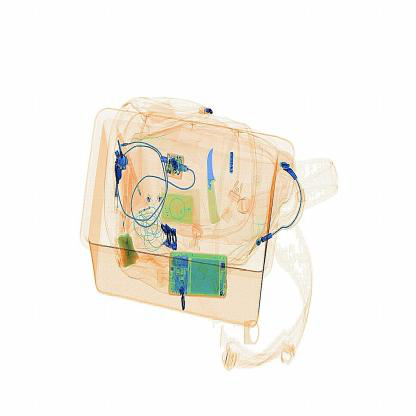

In [16]:
index = 144
image = Image.open(VAL_DATASET_PATH + IMAGES_FOLDER + "/" + val_labels["filename"][index])
image

In [17]:
image_np = np.array(image)
image_tensor = tf.convert_to_tensor(image_np, dtype=tf.uint8)[None, ...]

image_tensor

<tf.Tensor: shape=(1, 416, 416, 3), dtype=uint8, numpy=
array([[[[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],

        ...,

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254

tf.Tensor(
[[3. 2. 4. 5. 3. 4. 4. 1. 5. 3. 3. 3. 4. 1. 3. 4. 3. 4. 3. 4. 3. 3. 2. 3.
  4. 3. 4. 4. 4. 4. 3. 4. 4. 3. 4. 3. 4. 4. 3. 3. 3. 1. 5. 2. 4. 3. 1. 3.
  4. 2. 4. 3. 4. 4. 3. 4. 4. 5. 2. 1. 4. 2. 3. 3. 4. 2. 3. 3. 1. 3. 3. 4.
  4. 3. 3. 2. 3. 3. 4. 4. 4. 3. 4. 1. 2. 4. 4. 5. 3. 4. 3. 5. 3. 2. 4. 1.
  3. 5. 3. 5. 4. 3. 2. 4. 3. 3. 5. 4. 3. 4. 3. 3. 4. 3. 3. 4. 4. 4. 3. 3.
  5. 3. 3. 2. 4. 3. 1. 3. 4. 4. 3. 2. 2. 4. 4. 3. 3. 1. 3. 4. 1. 3. 3. 3.
  5. 3. 3. 4. 4. 4. 3. 4. 3. 4. 2. 2. 4. 3. 3. 2. 3. 3. 3. 3. 4. 3. 2. 4.
  3. 1. 5. 5. 4. 3. 4. 2. 2. 2. 3. 1. 3. 4. 3. 1. 3. 5. 4. 4. 4. 1. 2. 3.
  3. 3. 3. 2. 4. 3. 5. 5. 1. 3. 3. 1. 3. 4. 3. 2. 4. 2. 4. 3. 3. 3. 5. 4.
  3. 5. 3. 1. 2. 2. 4. 3. 4. 3. 3. 4. 4. 4. 1. 3. 4. 5. 4. 1. 3. 2. 1. 5.
  1. 3. 4. 4. 3. 4. 4. 3. 4. 2. 3. 4. 3. 4. 4. 5. 4. 5. 5. 4. 5. 4. 2. 4.
  4. 4. 4. 4. 1. 4. 4. 4. 2. 1. 2. 2. 1. 4. 4. 1. 4. 4. 5. 4. 2. 2. 5. 1.
  5. 5. 5. 5. 1. 2. 2. 1. 5. 1. 1. 2.]], shape=(1, 300), dtype=float32)
tf.Tensor(
[[2. 1. 3. 4. 2. 3

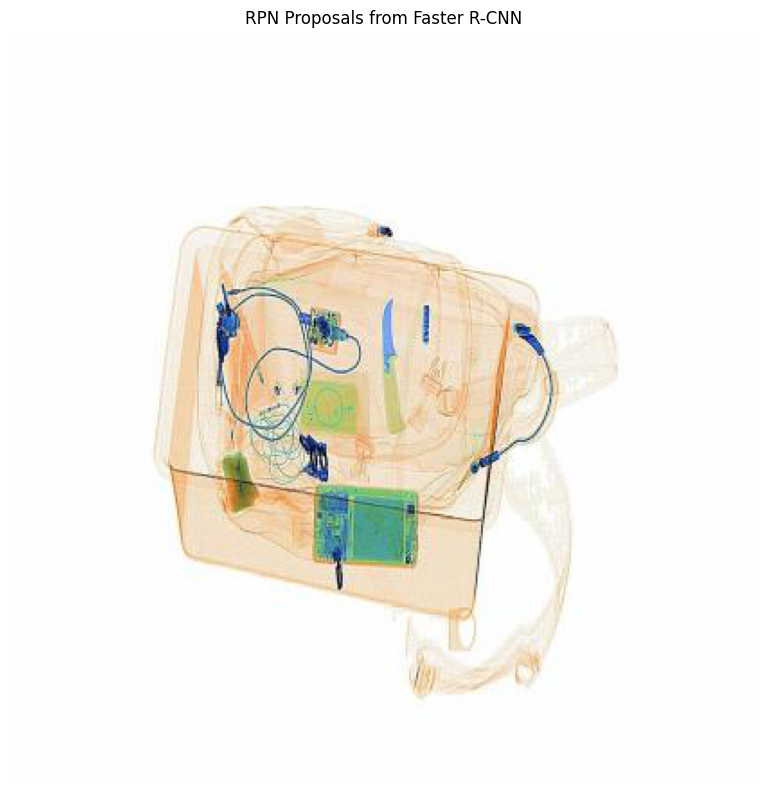

In [29]:
outputs = rcnn_model(image_tensor)
boxes = outputs["detection_boxes"][0].numpy()  # Normalized coords
scores = outputs["detection_scores"][0].numpy()
classes = outputs["detection_classes"][0].numpy()

# Filter boxes by score threshold
threshold = 0.5
selected_indices = np.where(scores > threshold)[0]
selected_boxes = boxes[selected_indices]
selected_classes = classes[selected_indices]

# Plot boxes
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)
im_width, im_height = image.size
for box in selected_boxes[:10]:  # First 10 boxes
    ymin, xmin, ymax, xmax = box
    rect = patches.Rectangle(
        (xmin * im_width, ymin * im_height),
        (xmax - xmin) * im_width,
        (ymax - ymin) * im_height,
        linewidth=2, edgecolor='red', facecolor='none'
    )
    ax.add_patch(rect)

print(outputs["detection_classes"])
print(tf.convert_to_tensor(outputs["detection_classes"][0].numpy() - 1)[None, ...])
ax.set_title("RPN Proposals from Faster R-CNN")
plt.axis('off')
plt.tight_layout()
plt.show()

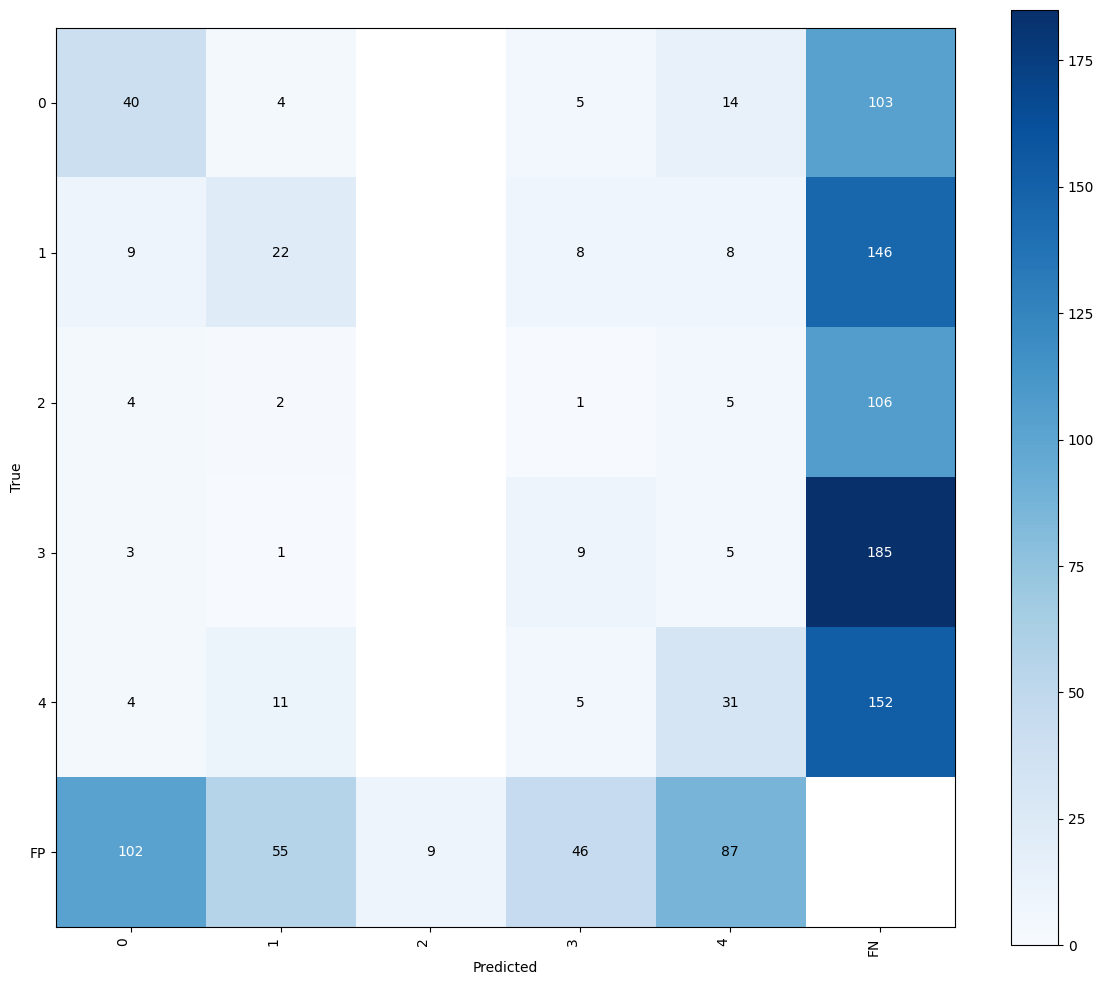

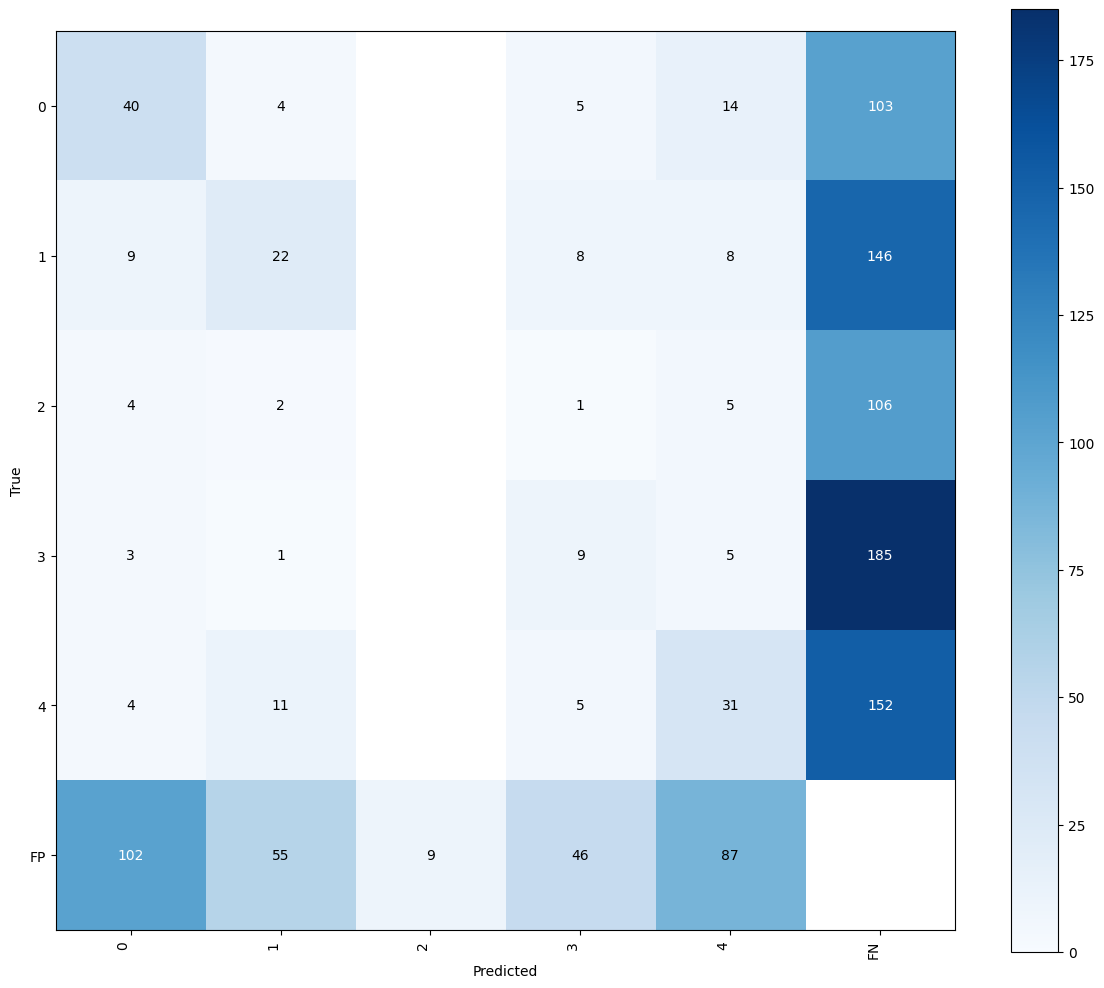

In [36]:
dataset = sv.DetectionDataset.from_yolo(images_directory_path=TEST_DATASET_PATH + IMAGES_FOLDER, annotations_directory_path=TEST_DATASET_PATH + "/labels", data_yaml_path=DATA_YAML)

def callback(image: np.array) -> sv.Detections:
    results = rcnn_model(tf.convert_to_tensor(image, dtype=tf.uint8)[None, ...])
    results["detection_classes"] = tf.convert_to_tensor(results["detection_classes"][0].numpy() - 1)[None, ...]

    return sv.Detections.from_tensorflow(results, image.shape[:-1])

matrix = sv.ConfusionMatrix.benchmark(
    conf_threshold=0.25,
    dataset=dataset,
    callback=callback
)

matrix.plot()